# COGS 108 - Predicting Electricity Use in California

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

In this project, we analyzed different features of a county to study how these may or may not correlate with the energy use of that county. We performed regression analysis on each of our chosen variables, and built a predictive models using the variables that we found correlated with the energy use of a county. We also discuss the social implications and importance of our work.

Video Presentation: https://drive.google.com/file/d/1Ui174PYZx8_cMtyuPkG6BKKPR5E4gAP0/view?usp=sharing

# Names

- Olivia Roth
- Amiet Scheidegger
- Riley Liu
- Katie Li

<a id='research_question'></a>
# Research Question

How does the income of residents in a California county affect the county’s energy use? 

## Background & Prior Work

For our final project we wanted to discuss an environmental issue regarding electricity consumption as much of our modern day is consumed by technology. With this boom in electricity usage, we wondered if we could make predictions on electricity use based on income and if there is a ripple effect of this on our environment or poverty levels. Since our location is specifically California, we decided to keep our research focused here. 
To better understand our topic, we looked at a discussion of California specifically and found that there have been restrictions set in place on the use of natural gases here in California which may seem, at surface level, as a promising factor. However, energy, or electricity in this case, becomes more expensive the more restrictions that are placed. Even looking at gas prices that are surging currently we can see how prices can affect even the most necessary of things. Since California also has one of the highest poverty rates in the nation, the increasing prices on electricity (or energy) are exacerbating this issue (1). As well, one article focused specifically on Los Angeles, stating that these wealthier areas use more energy than poor ones in coastal cities like Malibu, using the most at 95 million btu. It was also found that specific buildings like commercial, industry, and multifamily apartments use more energy than single family homes which could be a contributing factor that we must consider when analyzing our data (2). 

In California, households also typically require less average consumption of electrical energy, however, due to the high prices within the state, many homeowners spend up to the national average for electricity. Most of the actual spending on electricity comes from appliances, electronics, and lights while heating and cooling only makes up for about 31% of the energy consumed. California households also are recognized for having significantly more televisions than the average US household thus adding to the knowledge that California’s electrical energy usage is higher for things other than A/C (3). Overall, these figures suggest that increased electricity consumption could be a factor predicted by income. 
For environmental reasons, California is placing restrictions on the use of natural gases. While at first glance, this seems to be a good thing, it also makes energy much more expensive. California has one of the highest poverty rates in the nation, and the increasing prices of energy is contributing to this issue (1).

1)Poverty rates and energy costs: https://freopp.org/the-high-cost-of-california-electricity-is-increasing-poverty-d7bc4021b705
 
2)LA energy consumption: https://www.latimes.com/science/la-me-1001-ucla-energy-data-20151001-story.html

3)California energy use: https://www.eia.gov/consumption/residential/reports/2009/state_briefs/pdf/ca.pdf

4)Low income: https://iopscience.iop.org/article/10.1088/1748-9326/aba030

# Hypothesis

We predict that higher income counties will have higher rates of energy consumption compared to lower income counties. In Los Angeles, wealthy coastal cities use the most energy while poorer areas in the southeast part of the county use the least energy. California is also making energy more expensive by placing restrictions on the use of natural gases, which could negatively impact low-income areas. Based on our background research, we have found these statements to hold true, so we expect to continue to find this in our own findings.

# Dataset(s)

## - Dataset Name: California - Electricity Consumption by County
- Link to the dataset: https://www.kaggle.com/devkambhampati/california-electricity-consumption-by-county
- Number of observations: 58 counties, each with 3 types of observations: Residential, Non-Residential, and Total. Total of 174 observations.

The dataset contains electricity usage in 58 counties from 1990 to 2019, and each county’s electricity usage is divided into 3 sectors, one for residential electricity usage, one for non-residential electricity usage, and a total that sums the above two values. 
In addition to the total electricity usage per year, the data set also contains a totals column that adds the values across the rows, thus summing the total amount of electricity used throughout the 29 years by the 3 vectors mentioned above. 

- Dataset Name: US Household Income Statistics
- Link to the dataset: https://www.kaggle.com/goldenoakresearch/us-household-income-stats-geo-locations
- Number of observations: A total of 32,000 records on US Household Income.

The dataset includes information about household income organized by cities in each of the counties of the US states and territories, the income is given in the form of both mean and median along with the standard deviation. The dataset provides geological information through state code, state name, state abbreviation, county, city, place, type, zip code, and area code, as well as the number of households used in each calculation. 

- Dataset name: California Counties Fiscal Year 2016-17
- Link to dataset: https://www.kaggle.com/threattb/california-counties-fiscal-year-201617 
- Number of Observations: used 2 observations of the area in square miles of each county and estimated population 

In this dataset, we are provided with a list of counties that also include much information about zip code, class data, etc. However, the main focus was on the area in square miles and estimated population which is found when clicking the Entities tab. This data is specific to what we need in order to better understand population information for each county and how far of a spread the data is. This data is also used in our regression analysis when comparing energy use. 

*Comparing*: 
To better compare the datasets we would clean the US Household income data to only include the California counties so that it matches our energy consumption data. 
This would allow us to directly compare the two without extra data getting confused and congested. 
We would strip the word 'county' from the US Household income data as well. 
The income data would also need to be cleaned to only keep data for median and county names matching these names to the energy consumption dataset. 
We would also clean the energy consumption data to only include 2017 since that is what the US Household income includes. 
Our population data would also need to be cleaned to include county names and population numbers without commas. 
As well, we would make a counties table to visualize what the area in square miles each county is. 
It would also be better for us to keep the data separate during cleaning and then once the data has been cleaned we will merge everything together. 


# Setup

In [15]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Data Cleaning

### Loading all datasets

In [16]:
# Reading Electricity by County Data 
#electric_url = 'https://raw.githubusercontent.com/COGS108/Group025-Fa21/master/ElectricityByCounty%20CALIFORNIA%20Usage%20in%20Millions%20of%20kWh.csv?token=AV5JIPZN3ZUJOVAH22MVD4LBTL3M6'
electric_url = 'electricity.csv'
electric = pd.read_csv(electric_url) 

In [17]:
# Reading US Income Data 
#income_url = 'https://raw.githubusercontent.com/COGS108/Group025-Fa21/master/kaggle_income.csv?token=AV5JIP7YAGOE3PMVR2HO42TBTL3HG'
income_url = 'income.csv'
income = pd.read_csv(income_url, encoding='latin-1')

In [18]:
# Reading California County Fiscal Data
counties_url = 'counties.csv'
counties = pd.read_csv(counties_url)

### Cleaning electricity dataset

In [19]:
electric.head();

In [20]:
# Checking Datatypes
electric.dtypes;

In [21]:
# check for null entries 
electric.isnull().any();

In [22]:
# Keeping only County Name, Sector, and 2017 total data 
dropped_col_elect = ['2019', '2018', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', 'Total Usage'] 
electric_2017 = electric.drop(dropped_col_elect, axis =1) 
electric_2017['County'] = electric_2017['County'].str.strip()
electric_2017 = electric_2017[electric_2017['Sector'] == 'Total'].drop('Sector', axis = 1).reset_index().drop('index', axis=1).rename({'2017':'Energy Use'}, axis = 1)
electric_2017.head()

,County,Energy Use
0,ALAMEDA,11079.450563
1,ALPINE,18.976912
2,AMADOR,313.312866
3,BUTTE,1529.818607
4,CALAVERAS,347.931437


### Cleaning income dataset

In [23]:
income.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [24]:
# Checking Datatypes
income.dtypes;

In [25]:
#check for null entries 
income.isnull().any();

In [36]:
#Keeping only State Abbreviations, County Name, Median 
dropped_col_income = ['id', 'State_Code', 'State_Name', 'City', 'Place', 'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand', 'AWater', 'Lat', 'Lon', 'sum_w'] 
income_stats = income.drop(dropped_col_income, axis =1) 
income_stats.head()

,State_ab,County,Mean,Median,Stdev
0,AL,Mobile County,38773,30506,33101
1,AL,Barbour County,37725,19528,43789
2,AL,Shelby County,54606,31930,57348
3,AL,Mobile County,63919,52814,47707
4,AL,Mobile County,77948,67225,54270


In [37]:
# Removing all states that are not California (CA) 
CA_income_stats = income_stats.loc[income_stats['State_ab'] == 'CA'] 

# Averaging different county entries to get one value per county 
CA_income_stats = CA_income_stats.groupby(['County'], as_index=False).mean() 

# manipulate county names to match county names in energy consumption data set 
CA_income_stats['County'] = CA_income_stats['County'].str.strip('County').str.upper().str.strip()

CA_income_stats = CA_income_stats.rename({'Mean': 'Mean Income', 'Median': 'Median Income', 'Stdev': 'Standard Deviation of Income'}, axis=1)

CA_income_stats.head()

,County,Mean Income,Median Income,Standard Deviation of Income
0,ALAMEDA,78596.131394,101372.401854,53885.474425
1,AMADOR,52845.666667,216879.000000,33820.000000
2,BUTTE,63420.666667,49121.000000,51103.666667
3,ALAVERAS,81593.000000,42435.500000,74656.000000
4,RA COSTA,87779.833333,107466.333333,58249.166667


### Cleaning counties dataset

In [28]:
counties.head()

,Entity Name,Entity ID,Entity Type,County Name,City,State,Zip,Area in Square Miles,Estimated Population,Class Data,Fiscal Year End,Paper Report Due Date,Electronic Report Due Date,Report Ranking,County Budget Due Date
0,Alameda,1,CON,Alameda,Oakland,CA,94612,825,1645359,Chartered,630,131,131,8.0,1201
1,Alpine,2,CON,Alpine,Markleeville,CA,96120,727,1151,General Law,630,131,131,NaN,1201
2,Amador,3,CON,Amador,Jackson,CA,95642,601,38382,General Law,630,131,131,NaN,1201
3,Butte,4,CON,Butte,Oroville,CA,95965-3316,1665,226404,Chartered,630,131,131,NaN,1201
4,Calaveras,5,CON,Calaveras,San Andreas,CA,95249,1036,45168,General Law,630,131,131,NaN,1201


In [29]:
counties.shape

(57, 15)

In [30]:
counties = counties[['Entity Name', 'Area in Square Miles', 'Estimated Population']]
counties = counties.rename({'Entity Name': 'County', 'Estimated Population': 'Population'}, axis = 1)
counties.head()

,County,Area in Square Miles,Population
0,Alameda,825,1645359
1,Alpine,727,1151
2,Amador,601,38382
3,Butte,1665,226404
4,Calaveras,1036,45168


In [31]:
counties['County'] = counties['County'].str.strip().str.upper()
counties.head()

,County,Area in Square Miles,Population
0,ALAMEDA,825,1645359
1,ALPINE,727,1151
2,AMADOR,601,38382
3,BUTTE,1665,226404
4,CALAVERAS,1036,45168


### Merging datasets together

In [38]:
merged = electric_2017.merge(CA_income_stats, on='County')
merged = merged.merge(counties, on='County')

In [39]:
merged.head()

,County,Energy Use,Mean Income,Median Income,Standard Deviation of Income,Area in Square Miles,Population
0,ALAMEDA,11079.450563,78596.131394,101372.401854,53885.474425,825,1645359
1,AMADOR,313.312866,52845.666667,216879.000000,33820.000000,601,38382
2,BUTTE,1529.818607,63420.666667,49121.000000,51103.666667,1665,226404
3,FRESNO,7380.733777,43426.000000,159208.500000,50120.500000,5998,995975
4,GLENN,390.979920,43059.000000,36830.000000,25925.000000,1319,28731


# Data Visualization

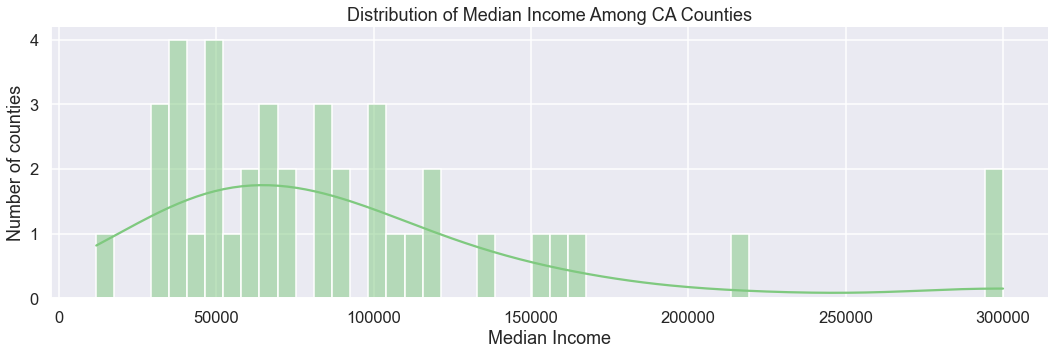

In [27]:
# Viewing distribution of Median Income Among CA Counties
sns.set_palette(sns.color_palette("Accent", 1))
ax = sns.displot(merged['Median Income'], kde=True, bins=50, height=5, aspect=3)

ax.set_axis_labels("Median Income", "Number of counties")
ax.set(title="Distribution of Median Income Among CA Counties")

The distribution for median income among CA counties in 2017 has a positive skew. Looking at the distribution graph, counties in CA have a median income around the 50,000 - 100,000 USD range. There are some outliers beyond 200,000 USD which is causing the skew in the data.

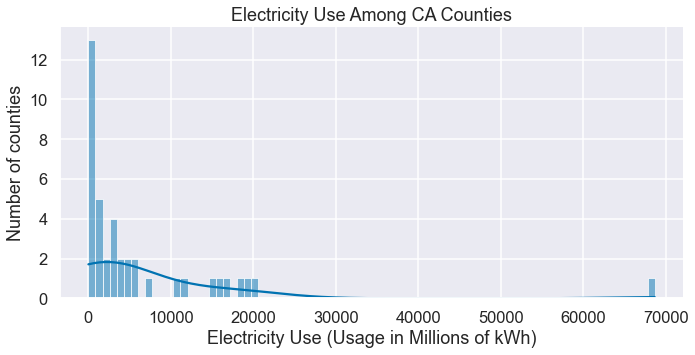

In [28]:
# Viewing Distribution of Electricity Use Among CA Counties
sns.set_palette(sns.color_palette("colorblind", 1))
ax = sns.displot(merged['Energy Use'], kde=True, bins=80, height=5, aspect=2)

ax.set_axis_labels("Electricity Use (Usage in Millions of kWh)", "Number of counties")
ax.set(title="Electricity Use Among CA Counties")
plt.show()

The distribution for electricity use among CA counties in 2017 has a positive skew. Most counties use an amount between 0 - 20,000 Millions of kWh of energy. There is an outlier beyond 30,000 Millions of kWh.

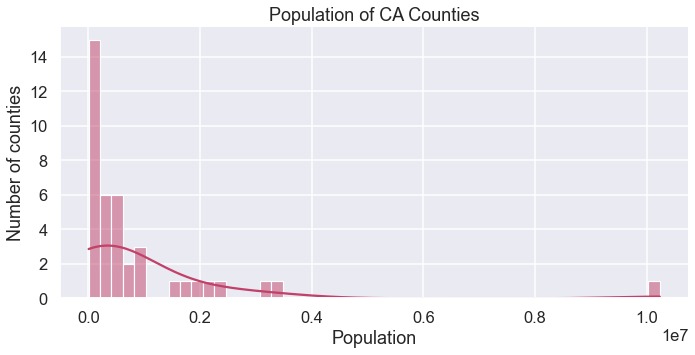

In [29]:
# Viewing distribution of Population Among CA Counties
sns.set_palette(sns.color_palette("flare", 1))
ax = sns.displot(merged['Population'], kde=True, bins=50, height=5, aspect=2)

ax.set_axis_labels("Population", "Number of counties")
ax.set(title="Population of CA Counties")
plt.show()

The distribution for population of CA counties has a positive skew, with most counties having a population count of between 0 - 4,000,000. There is an outlier beyond 4,000,000, which is responsible for the skew.

# Data Analysis & Results (EDA)

In [30]:
merged.head()

,County,Energy Use,Mean Income,Median Income,Standard Deviation of Income,Population,Area in Square Miles
0,ALAMEDA,11079.450563,78596.131394,101372.401854,53885.474425,1646405,825
1,AMADOR,313.312866,52845.666667,216879.000000,33820.000000,38382,601
2,BUTTE,1529.818607,63420.666667,49121.000000,51103.666667,226403,1665
3,FRESNO,7380.733777,43426.000000,159208.500000,50120.500000,995233,5998
4,GLENN,390.979920,43059.000000,36830.000000,25925.000000,28730,1319


In [31]:
merged.dtypes

County                           object
Energy Use                      float64
Mean Income                     float64
Median Income                   float64
Standard Deviation of Income    float64
Population                        int64
Area in Square Miles              int64
dtype: object

In [44]:
# identify outliers
merged[merged['Energy Use'] > 30000]

,County,Energy Use,Mean Income,Median Income,Standard Deviation of Income,Population,Area in Square Miles
9,LOS ANGELES,68656.720182,80469.625,69254.4375,56014.625,10231271,4079


### Regression Analysis for Energy Use vs. Median Income

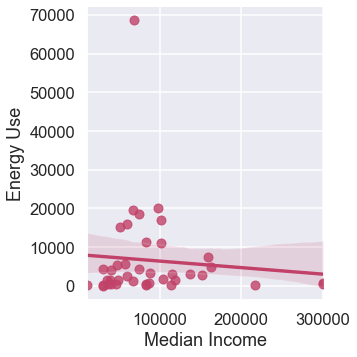

In [32]:
sns.lmplot(x = 'Median Income', y ='Energy Use', data = merged);

In [40]:
# identify outliers
merged[merged['Median Income'] > 200000]

,County,Energy Use,Mean Income,Median Income,Standard Deviation of Income,Area in Square Miles,Population
1,AMADOR,313.312866,52845.666667,216879.0,33820.0,601,38382
8,LASSEN,385.690994,91621.500000,300000.0,48305.5,4690,30918
17,NEVADA,740.855019,30614.000000,300000.0,2958.0,992,98828


In [35]:
energy = merged['Energy Use']
med = merged['Median Income']
dependent, predictors = patsy.dmatrices('energy ~ med', merged)
model = sm.OLS(dependent, predictors)
res_1 = model.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.3327
Date:                Tue, 07 Dec 2021   Prob (F-statistic):              0.567
Time:                        10:12:11   Log-Likelihood:                -431.03
No. Observations:                  40   AIC:                             866.1
Df Residuals:                      38   BIC:                             869.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8089.8899   3257.118      2.484      0.0

This plot and regression analysis show that median income is uncorrleated with energy use.

### Regression Analysis for Energy Use vs. Mean Income

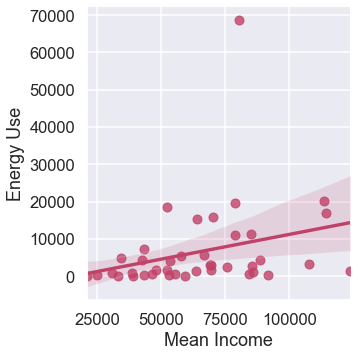

In [42]:
sns.lmplot(x = 'Mean Income', y ='Energy Use', data = merged);

In [43]:
energy = merged['Energy Use']
med = merged['Mean Income']
dependent, predictors = patsy.dmatrices('energy ~ med', merged)
model = sm.OLS(dependent, predictors)
res_1 = model.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3.311
Date:                Tue, 07 Dec 2021   Prob (F-statistic):             0.0767
Time:                        10:16:18   Log-Likelihood:                -429.54
No. Observations:                  40   AIC:                             863.1
Df Residuals:                      38   BIC:                             866.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2035.7386   5055.867     -0.403      0.6

This plot and regression analysis show that mean income is slightly positivly correlated with energy use, the r squared value is not statistically significant.

### Regression Analysis for Energy Use vs. Standard Deviation of Income

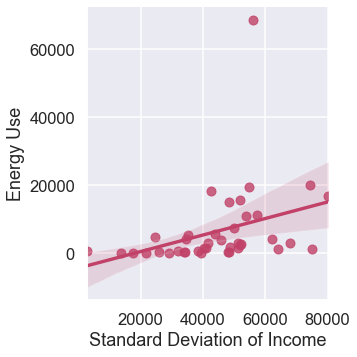

In [36]:
sns.lmplot(x = 'Standard Deviation of Income', y ='Energy Use', data = merged);

In [38]:
energy = merged['Energy Use']
med = merged['Standard Deviation of Income']
dependent, predictors = patsy.dmatrices('energy ~ med', merged)
model = sm.OLS(dependent, predictors)
res_1 = model.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     5.047
Date:                Tue, 07 Dec 2021   Prob (F-statistic):             0.0306
Time:                        10:13:44   Log-Likelihood:                -428.71
No. Observations:                  40   AIC:                             861.4
Df Residuals:                      38   BIC:                             864.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4291.2988   5143.185     -0.834      0.4

This plot and regression analysis show that standard deviation of income is slightly positivly correlated with energy use, but the r squared value is not statistically significant.

### Regression Analysis for Energy Use vs. Population

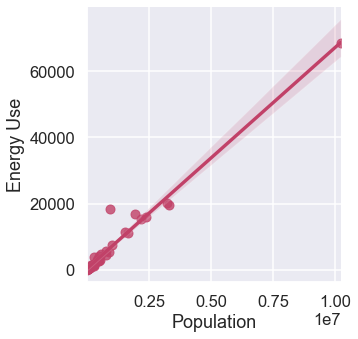

In [33]:
sns.lmplot(x = 'Population', y ='Energy Use', data = merged);

In [41]:
# identify outliers
merged[merged['Population'] > 10000000]

,County,Energy Use,Mean Income,Median Income,Standard Deviation of Income,Area in Square Miles,Population
9,LOS ANGELES,68656.720182,80469.625,69254.4375,56014.625,4079,10241278


In [36]:
energy = merged['Energy Use']
population = merged['Population']
dependent, predictors = patsy.dmatrices('energy ~ population', merged)
model = sm.OLS(dependent, predictors)
res_2 = model.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1089.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.40e-29
Time:                        10:12:54   Log-Likelihood:                -363.41
No. Observations:                  40   AIC:                             730.8
Df Residuals:                      38   BIC:                             734.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    536.1050    391.496      1.369      0.1

This plot and regression analysis show that population is highly positivly correlated with energy use, and is likley to be a predictive factor.

### Regression Analysis for Energy Use vs. Area in Square Miles

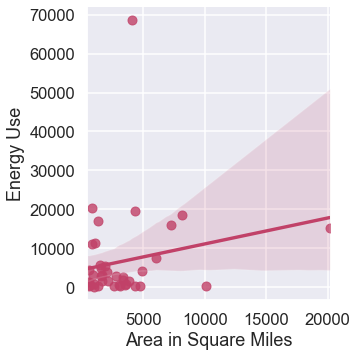

In [37]:
sns.lmplot(x = 'Area in Square Miles', y ='Energy Use', data = merged);

In [42]:
# identify outliers
merged[merged['Area in Square Miles'] > 15000]

,County,Energy Use,Mean Income,Median Income,Standard Deviation of Income,Area in Square Miles,Population
23,SAN BERNARDINO,15283.329154,63765.818182,52047.545455,48323.545455,20164,2160256


In [46]:
energy = merged['Energy Use']
med = merged['Area in Square Miles']
dependent, predictors = patsy.dmatrices('energy ~ med', merged)
model = sm.OLS(dependent, predictors)
res_1 = model.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.576
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.217
Time:                        10:48:37   Log-Likelihood:                -430.40
No. Observations:                  40   AIC:                             864.8
Df Residuals:                      38   BIC:                             868.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4429.4369   2506.569      1.767      0.0

This plot and regression analysis show that area is uncorrleated with energy use.

### Building a Predictive Model

In [57]:
merged.head()

,County,Energy Use,Mean Income,Median Income,Standard Deviation of Income,Population,Area in Square Miles
0,ALAMEDA,11079.450563,78596.131394,101372.401854,53885.474425,1646405,825
1,AMADOR,313.312866,52845.666667,216879.000000,33820.000000,38382,601
2,BUTTE,1529.818607,63420.666667,49121.000000,51103.666667,226403,1665
3,FRESNO,7380.733777,43426.000000,159208.500000,50120.500000,995233,5998
4,GLENN,390.979920,43059.000000,36830.000000,25925.000000,28730,1319


#### Create training and test sets

In [48]:
num_training = int(len(merged)*.8)
num_testing = int(len(merged) - num_training)

In [104]:
merged_X = merged[['Population', 'Mean Income', 'Standard Deviation of Income', 'County']]
merged_Y = np.array(merged['Energy Use'])

In [105]:
merged_train_X = merged_X[:num_training]
merged_train_Y = merged_Y[:num_training]
merged_test_X = merged_X[num_training:]
merged_test_Y = merged_Y[num_training:]

#### Build model with selected features

In [136]:
def energy_model(df):
    
    preproc = ColumnTransformer(transformers=[('County', OneHotEncoder(), ['County'])])
    p = Pipeline(steps=[('preprocessor', preproc), ('tree', KNeighborsRegressor(n_neighbors=2))])
    p.fit(df[['Population', 'Mean Income', 'Standard Deviation of Income', 'County']], df['Energy Use'])

    return p

In [137]:
regr1 = energy_model(merged)

#### Test model performance on training and test sets

In [138]:
regr1.score(merged_train_X, merged_train_Y)

0.6652634617758859

In [139]:
regr1.score(merged_test_X, merged_test_Y)

0.3841154557123838

# Ethics & Privacy

We did not include any personally identifying information (ex. family income, address) within our data, as we used average income levels that is publicly available on the internet. There is also no record of individual household incomes or specific addresses, as we correlated average income levels with different counties in California. We cannot know where in the county a household is located or how much their annual income is based on the level of specifity in our data.

In terms of including a representative sample, no populations should have been left out since we used county and state documentation of income levels and energy consumption levels, and data from all populations within a county or state should have been accounted for. Variables like income level and energy consumption can be objectively collected, so human biases in collecting the data should not be a concern.

# Conclusion & Discussion

In this project, we aimed to understand how income statistics of a county could help predict the energy use of that county. Initially, we thought that the higher the median income of a county, the more energy they would use. After doing a regression analysis on energy use vs. median income, we found that they were uncorrelated. We performed regression analysis on more variables and found that energy use was very highly (positively) correlated with population, but was not correlated with the any income statistics or area (in square miles) of the county. We realized that while a larger income may lead to more energy use on an individual (or even neighborhood-wide level), this does not extend to larger areas such as counties. On the county level, we also need to take into account the energy used by public facilities (not just individual households) and also the wide range of incomes a single county can have. 

After performing the regressions analysis, we attempted to build a predictive model that would predict how much energy a county would use. We used the KNeighborsRegressor model from sklearn (using 2 neighbors). We based the features we used on how well they correlated with energy use, so we used population, mean income, and standard deviation of income (and county). Althought median and standard deviatin of income were not did not have statistcally significant r squared values, they still showed slight correlation in the graphs and we wanted to use more variable in our model. We split our dataset into training and testing data. Our model performed with 66% accuracy on our training data and with 38% accuracy on our testing data. Our model did not perform very well partially due to the lack of data. Since we only used California counties, we had very few data points. Our model could have been trained better if we used more data, such as using all the counties in the US or performing the same process on a city-wide basis.We used 4 data sets, and although they had many variables, only a few were actually usable for our prediction model, and this created some limitations. Our model could be improved by using more predictive variables. Population size was very predictive, but our other variables were not as strongly correlated.

In conclusion, we found that the mean income and standard deviation of income are positively correlated with a county’s energy use, but that income statistics are not as strongly correlated, or as strong of a predictor, than a county’s population is. Energy consumption is currently one of the major topics in the environmental sphere. Many areas are switching to using clean energy - even San Diego has stopped building houses that use gas. Being able to predict a neighborhood, or city, or county’s energy use can be valuable as it can help leaders make decisions about important changes being implemented such as new methods to source clean energy. However, this issue is complex, because clean energy can also be more expensive. This can affect a city or county on a large scale, but can also affect people on an individual level. There has been research that shows that the increasing energy costs in California, due to the transition to cleaner energy, is leading to higher rates of poverty. This is one example of why it is important to look at issues such as energy use through an intersectional perspective. The kind work we did is valuable, and the transition to cleaner energy is important for our future, but as data scientists, we need to make sure to look at our data from every angle to make sure we can help make decisions that ultimately benefit our society.

# Team Contributions

- Amiet: data analysis, discussion and conclusions 

- Olivia: Background & prior Work, dataset research, research question formation, overview, slides for video presentation, overall proofreading 

- Katie: Background resources, dataset research, data summarization, general data cleaning, video presentation, video editing

- Riley: EDA, ethics and privacy 
